
#	Correcting Data Classification and creating a good database
#	AUTHOR: 乔昂 - jueta
#	DATE: 13/12/2022


In [1]:
import pandas as pd
import json
  

df = pd.read_feather('map5')

In [2]:
df.head()

,index,name,data [nA],flow rate [m3/s],voltage,current PS,temperature,humidity,date and time,target voltage,mean,variance,deviation,median,rms,spray mode
0,sample 0,setup/liquid/ethanol,"[-64.90565490722656, -72.70440673828125, -71.4...",0.1,4501.74,-1.675510e-08,0,0,Fri_10 Feb 2023,4500,-22.780567,261.774475,16.179445,-18.364780,27.941526,[Undefined]
1,sample 1,setup/liquid/ethanol,"[-3.773584842681884, -2.01257848739624, -5.786...",0.1,4501.74,-1.675510e-08,19.40\r\n,0,Fri_10 Feb 2023,4500,-0.710118,23.613165,4.859338,-0.503145,4.910950,[Undefined]
2,sample 2,setup/liquid/ethanol,"[0.7547169923782341, -3.522012710571289, 0.754...",0.1,4501.74,-1.675510e-08,19.40\r\n,38,Fri_10 Feb 2023,4500,-0.401273,23.839987,4.882621,0.000000,4.899082,[Undefined]
3,sample 3,setup/liquid/ethanol,"[-3.773584842681884, 0.25157231092453003, 1.50...",0.1,4501.74,-1.675510e-08,19.40\r\n,38,Fri_10 Feb 2023,4500,-0.173640,23.772942,4.875751,0.251572,4.878841,[Undefined]
4,sample 4,setup/liquid/ethanol,"[-3.2704403400421143, -5.534591197967529, -6.2...",0.1,4501.74,-1.675510e-08,19.40\r\n,38,Fri_10 Feb 2023,4500,-0.185917,23.495802,4.847247,0.251572,4.850811,[Undefined]


In [3]:
'''
	Analysis of mapping V x FR experiments
	AUTHOR: 乔昂 - jueta
	DATE: 19/01/2023
'''

import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
from sklearn.utils import column_or_1d
import numpy as np
from scipy.signal import butter, lfilter



In [4]:


colormap = []
for electro_class in df['spray mode']:
    if electro_class == 'Intermittent':
        colormap.append('blue')
    elif electro_class == 'Cone Jet':
        colormap.append('red')
    elif electro_class == 'Dripping':
        colormap.append('green')
    elif electro_class == 'Multi Jet':
        colormap.append('purple')
    elif electro_class == 'Corona':
        colormap.append('cyan')
    elif electro_class == 'Undefined':
        colormap.append('black')
    else:
        colormap.append('black')


df.insert(1, 'colormap', colormap)


In [5]:

print(df.info())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880 entries, 0 to 3879
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             3880 non-null   object 
 1   colormap          3880 non-null   object 
 2   name              3880 non-null   object 
 3   data [nA]         3880 non-null   object 
 4   flow rate [m3/s]  3880 non-null   float64
 5   voltage           3880 non-null   float64
 6   current PS        3880 non-null   float64
 7   temperature       3880 non-null   object 
 8   humidity          3880 non-null   int64  
 9   date and time     3880 non-null   object 
 10  target voltage    3880 non-null   int64  
 11  mean              3880 non-null   float64
 12  variance          3880 non-null   float64
 13  deviation         3880 non-null   float64
 14  median            3880 non-null   float64
 15  rms               3880 non-null   float64
 16  spray mode        3880 non-null   object 


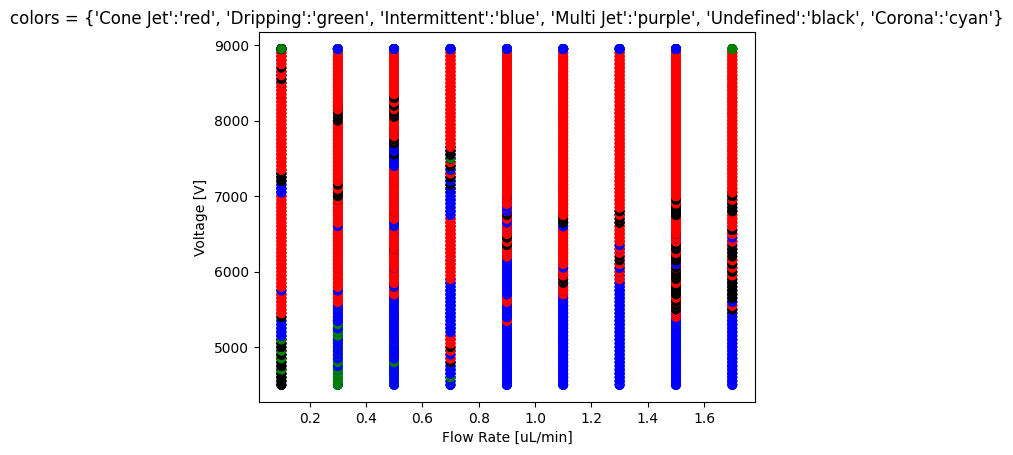

In [6]:


df['flow rate [m3/s]'] = df['flow rate [m3/s]'].astype(float)
plt.scatter(df['flow rate [m3/s]'], df['target voltage'], color=df['colormap'])
plt.ylabel('Voltage [V]')
plt.xlabel('Flow Rate [uL/min]')
plt.title("colors = {'Cone Jet':'red', 'Dripping':'green', 'Intermittent':'blue', 'Multi Jet':'purple', 'Undefined':'black', 'Corona':'cyan'}")
plt.show()
